In [1]:
import random
import sys

import torch

sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)


['/Users/david/Documents/mastersCode/ubm/library', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm']


In [2]:
from library.torchaudio_augmentations.torchaudio_augmentations import *
import my_torch.torchio as tio

In [10]:
import torchaudio
from torchaudio.utils import download_asset
from my_torch.tuts2.combo_torch_transforms import *


SAMPLE_WAV = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.wav")
process_normal = file_vad_normalize()
audio_normal = process_normal(SAMPLE_WAV)
num_samples = audio_normal.shape[-1]


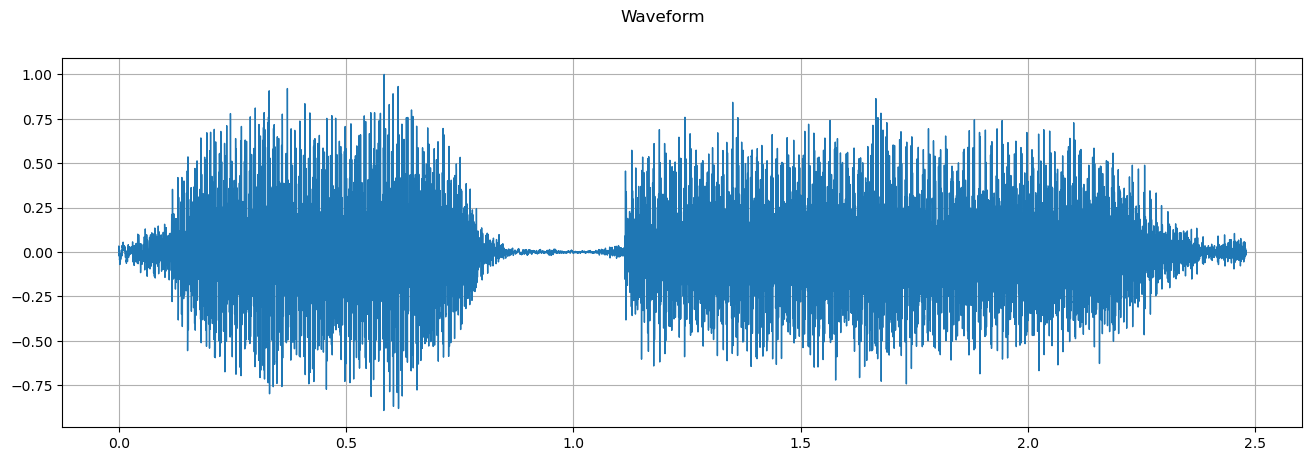

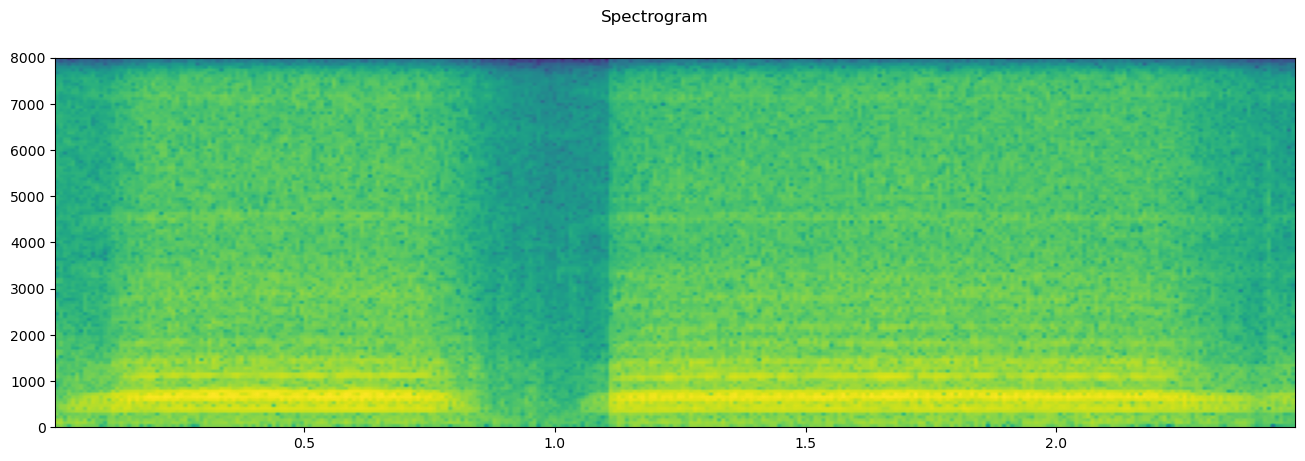

In [9]:
tio.plot_waveform(audio_normal)
tio.plot_specgram(audio_normal)
tio.play_audio(audio_normal)

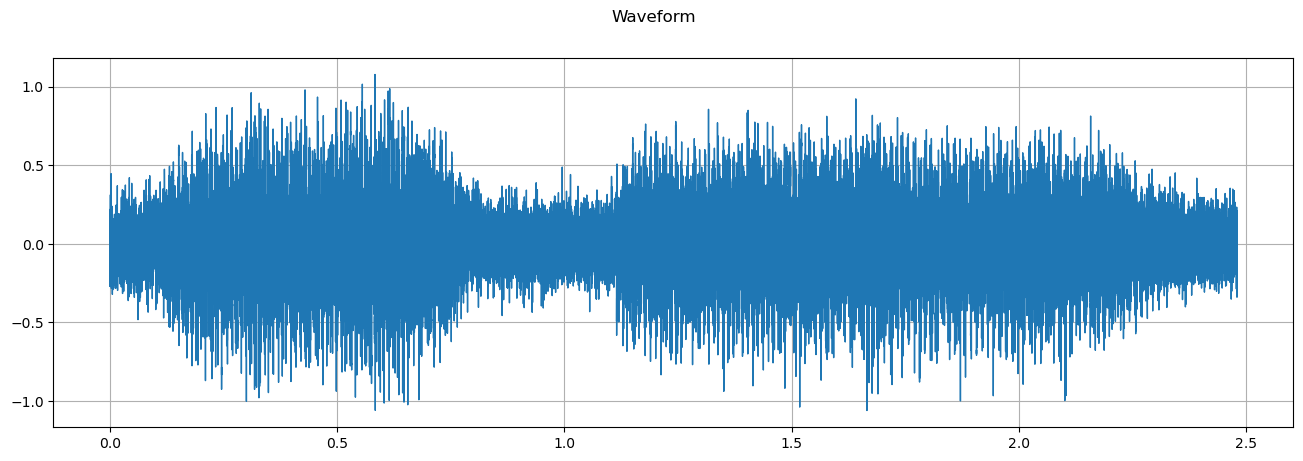

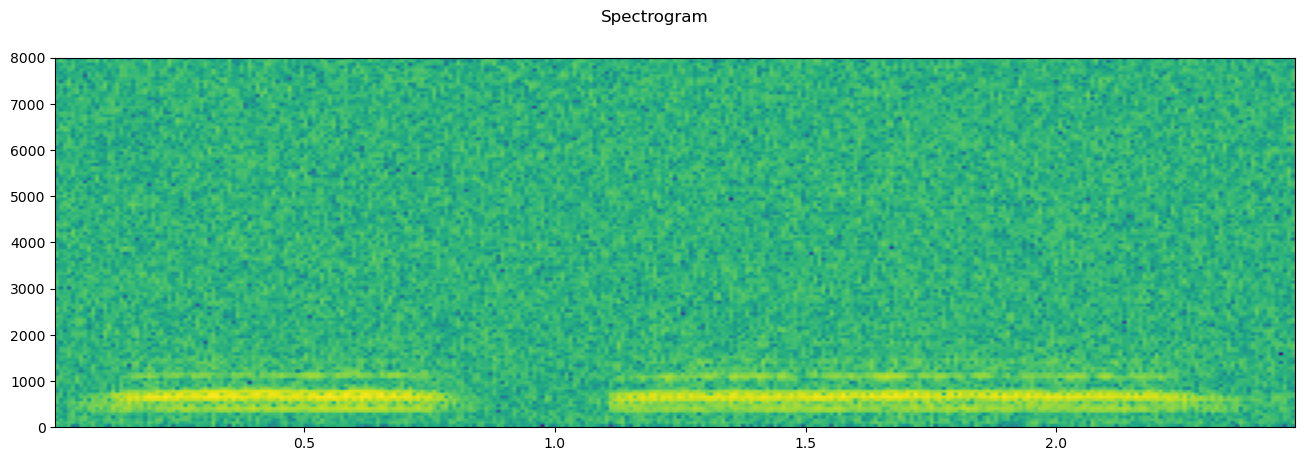

In [16]:
import config
sr = config.SAMPLE_RATE

transforms = [
    # RandomResizedCrop(n_samples=num_samples),
    RandomApply([PolarityInversion()], p=0.99),
    RandomApply([Noise(min_snr=0.5, max_snr=0.5)], p=0.999),
    RandomApply([Gain()], p=0.99),
    HighLowPass(sample_rate=sr), # this augmentation will always be applied in this aumgentation chain!
    # RandomApply([Delay(sample_rate=sr)], p=0.99),
    RandomApply([PitchShift(
        n_samples=num_samples,
        sample_rate=sr
    )], p=0.99),
    # RandomApply([Reverb(sample_rate=sr)], p=0.99)
]

transform = Compose(transforms=transforms)
transformed_audio = transform(audio_normal)

tio.plot_waveform(transformed_audio)
tio.plot_specgram(transformed_audio)
tio.play_audio(transformed_audio)

In [17]:
# transforms = [
#     RandomResizedCrop(n_samples=num_samples),
#     RandomApply([PolarityInversion(), Noise(min_snr=0.001, max_snr=0.005)], p=0.8),
#     RandomApply([Gain()], p=0.2),
#     RandomApply([Delay(sample_rate=sr), Reverb(sample_rate=sr)], p=0.5)
# ]

In [4]:

# >> transformed_audio.shape = [num_channels, num_samples]

In [5]:
tio.play_audio(transformed_audio)